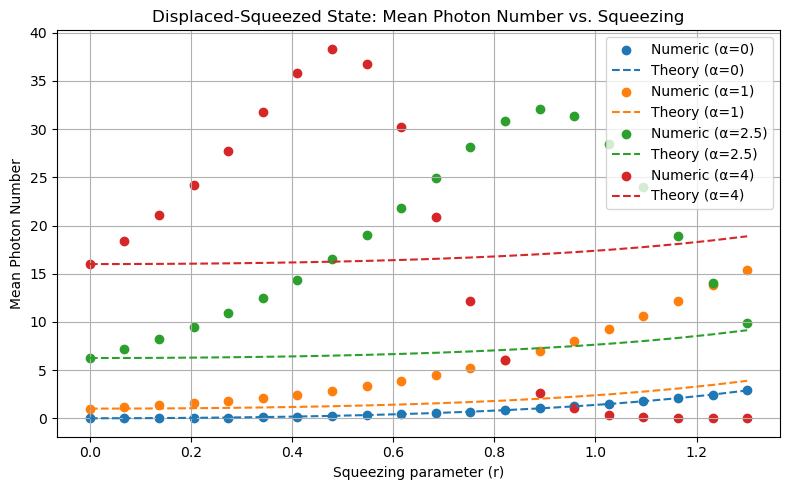

In [2]:
import strawberryfields as sf
from strawberryfields.ops import Sgate, Dgate
import numpy as np
import matplotlib.pyplot as plt

# Fock cutoff dimension for numerical simulations
cutoff_dim = 60

# Three displacement values
alpha_list = [0,1, 2.5,4]

# Range of squeezing values
r_values = np.linspace(0, 1.3, 20)

# Arrays to store numerical and theoretical mean photon numbers
mean_photon_data = np.zeros((len(alpha_list), len(r_values)))
theory_data      = np.zeros((len(alpha_list), len(r_values)))

for i, alpha in enumerate(alpha_list):
    for j, r in enumerate(r_values):
        # -- Numerical (Strawberry Fields) --
        prog = sf.Program(1)  # single-mode program
        with prog.context as q:
            # First squeeze, then displace
            Dgate(alpha, 0) | q[0]
            Sgate(r, np.pi) | q[0]
            

        eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff_dim})
        result = eng.run(prog)
        state = result.state

        # Mean photon number from the simulated state
        mean_photon_data[i, j] = state.mean_photon(0)[0]

        # -- Theoretical formula for |D(alpha) S(r) 0> --
        # For real alpha, zero phases:
        #   <n> = sinh^2(r) + alpha^2
        theory_data[i, j] = np.sinh(r)**2 + alpha**2

# ---------------- Plot Results ----------------
plt.figure(figsize=(8, 5))

for i, alpha in enumerate(alpha_list):
    # Numerical result (dots)
    plt.scatter(r_values, mean_photon_data[i], marker="o", label=f"Numeric (α={alpha})")
    # Theoretical formula (dashed line)
    plt.plot(r_values, theory_data[i], "--", label=f"Theory (α={alpha})")

plt.xlabel("Squeezing parameter (r)")
plt.ylabel("Mean Photon Number")
plt.title("Displaced-Squeezed State: Mean Photon Number vs. Squeezing")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()